# Изучение рынка заведений общественного питания Москвы

- Автор: Михайлов Станислав Владимирович
- Дата: 31.07.2025

### Цели и задачи проекта

Целью данного проекта является исследование заведений общественного питани Москвы для того, чтобы помочь заказчику определиться с форматом заведения и расположения в Москве.

### Описание данных


В проекте будут использованы данные датасетов `rest_info.csv` и `rest_price.csv`.

**Датасет rest_info.csv  содержит информацию о заведениях общественного питания:**

- `id` - id заведения;
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.<br><br>

**Датасет rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:**

- `id` - id заведения;
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
    - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Структура проекта

* [1. Загрузка данных и знакомство с ними](#id1)
    * [1.1. Подготовка единого датафрейма](#id2)
* [2. Предобработка данных](#id3)
    * [2.1. Наличие пропусков в данных](#id4)
    * [2.2. Типы данных](#id5)
    * [2.3. Явные и неявные дубликаты в данных](#id6)
    * [2.4. Промежуточный вывод](#id7)
* [3. Исследовательский анализ данных](#id8)
    * [3.1. Исследование количества заведений по категориям](#id9)
    * [3.2. Исследование распределения заведений по районам Москвы](#id10)
    * [3.3. Исследование количества сетевых и несетевых заведений](#id11)
    * [3.4. Исследование количества посадочных мест](#id12)
    * [3.5. Исследование рейтинга заведений](#id13)
    * [3.6. Исследования взаимосвязи данных](#id14)
    * [3.7. Исследование рейтинга топ-15 сетевых заведений](#id15)
    * [3.8. Исследование влияния расположения заведения на среднюю стоимость чека](#id16)
    * [3.9. Промежуточный вывод](#id17)
* [4. Итоговый вывод и рекомендации](#id18)

### Используемые в проекте функции

In [1]:
def abs_rel_values(df, filter, num_round=1):
    """"
    Функция фильтрует датасет по указанному столбцу,
    затем находит уникальные значения,
    после этого выводит выводит их количеств и долю.
    
    df - датафрейм, с которым будем работать;
    filter - столбец, по которому будет производиться фильтрация
              и подсчет уникальных строк;
    num_round - параметр округления задающий, какое количество
                чисел останется после запятой.
    """
    # Создаем серию с подсчетом количества уникальных значений
    abs_values = (df[filter]
                  .value_counts()
                  .sort_values(ascending=False))

    # Создаем серию с подсчетом доли уникальных значений
    rel_values = round(
                    df[filter]
                    .value_counts(normalize=True)
                    .sort_values(ascending=False) * 100
                    , num_round)

    # Объединяем серии по столбцам
    result = pd.concat([abs_values, rel_values], axis=1)
    result.columns = ['Количество', 'Доля (%)']

    # Выводим результат
    return result

<a id="id1"></a>
## Загрузка данных и знакомство с ними

Загрузим данные датасетов `rest_info.csv` и `rest_price.csv`. Загрузим библиотеку `pandas` для анализа данных, библиотеки для визуализации: `matplotlib`, `seaborn` и библиотеку `phik` для построения матрицы корреляции. Датасеты сохраним в двух переменных: `rest_info_df` и `rest_price_df`.

In [2]:
# Устанавливаем библиотеку Pandas
try:
    import pandas as pd
except ModuleNotFoundError:
    !pip install pandas
    import pandas as pd

# Устанавливаем библиотеку matplotlib
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    
# Устанавливаем библиотеку seaborn
try:
    import seaborn as sns
except ModuleNotFoundError:
    !pip install seaborn
    import seaborn as sns
    
# Из библиотеки phik подгружаем метод phik_matrix
try:
    from phik import phik_matrix
except ModuleNotFoundError:
    !pip install phik
    from phik import phik_matrix


In [3]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
try:
    rest_info_df = pd.read_csv('/datasets/rest_info.csv')
except FileNotFoundError:
    rest_info_df = pd.read_csv('datasets/rest_info.csv')
    
try:
    rest_price_df = pd.read_csv('/datasets/rest_price.csv')
except FileNotFoundError:
    rest_price_df = pd.read_csv('datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info_df`. Выведем его первые 5 строк с помощью метода `.head()` и основную информацию о датасете методом `.info()`.

In [4]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим основную информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в котором представлена информация о заведениях общественного питания.

**После первичного анализа можно сделать следующие выводы:**
- Значения в столбцах соответствуют своему описанию.
- Наименования столбцов не нуждаются в корректировке.
- Наблюдаются пропуски в столбцах `hours` и `seats`. Остальные столбцы следует проверить на наличие индикаторов-пропусков.
- Тип данных для всех столбцов, за исключением `seats` и `chain`, соответствует хранимым в них данным. Столбец `seats` необходимо будет преобразовать в `int`, а `chain` в `bool`. Так же необходимо рассмотреть возможность понижения разрядности для столбцов `rating`, `chain`.
- В столбце `hours` указана информация о работе заведений в формате "пн-чт 11:00-02:00, сб 11:00-05:00 и тд.". Если возникнет необходимость проведения анализа работы кофеин по дням или часам, рекомендуется разбить информацию в этом столбце на отдельные столбцы. Предполагаемый формат столбцов: 
    - пн открытие - 8:00.
    - пн закрытие - 20:00.
    - вт открытие - 8:00.
    - пн закрытие - 20:00.<br>
    ...
    - вс закрытие - 20:00.


Познакомимся с данными датасета `rest_price_df`.

In [6]:
# Выводим первые строки датафрейма на экран
rest_price_df.head(5)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим основную информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в котором представлена информация о среднем чеке в заведениях общественного питания.


**После первичного анализа можно сделать следующие выводы:**
- Значения в столбцах соответствуют своему описанию.
- Наименования столбцов не нуждаются в корректировке.
- Наблюдаются пропуски в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.
- Тип данных для всех столбцов подобран верно. Стоит рассмотреть возможность оптимизации разрдности `middle_avg_bill` и `middle_coffee_cup`.

<a id="id2"></a>
### Подготовка единого датафрейма

Для дальнейшей работы объединим два датасета в один и присвоим ему имя - `df`. Так как количество строк в датафрейме `rest_info` - 8406 шт., а в `rest_price` - 4058 шт.  объединение датафреймов будет производить по левому джоину, где левой таблицей будет `rest_info`, а правой `rest_price` - это позволит нам не потерять данные.

In [8]:
# Объединяем два датасета с помощью left join
df = pd.merge(rest_info_df, rest_price_df, on='id', how='left')

In [9]:
# Проверяем корректность объединения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные объединились корректно, строки потеряны не были.

<a id="id3"></a>
## Предобработка данных

<a id="id4"></a>
### Наличие пропусков в данных

При первичном анализе были обнаружены пропуски в следующих столбцах: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.

Изучим количество пропусков в абсолютных и относительных значениях.

In [10]:
# Выведем количество пропусков во всем датафрейме

# В абсолютных значениях
print('Количество пропусков, шт.:')
display(df.isna().sum().sort_values(ascending=False))
print()

# В относительных значениях
print('Количество пропусков, %:')
display(round(df.isna().mean().sort_values(ascending=False) * 100, 1))

Количество пропусков, шт.:


middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
district                0
category                0
name                    0
id                      0
address                 0
chain                   0
rating                  0
dtype: int64


Количество пропусков, %:


middle_coffee_cup    93.6
middle_avg_bill      62.5
price                60.6
avg_bill             54.6
seats                43.0
hours                 6.4
district              0.0
category              0.0
name                  0.0
id                    0.0
address               0.0
chain                 0.0
rating                0.0
dtype: float64

Наблюдаются пропуски в следующих столбцах:
- `middle_coffee_cup` - 7871 строк (93.6%).
- `middle_avg_bill` - 5257 строки (62.5%).
- `price` - 5091 строка (60.6%). 
- `avg_bill` - 4590 строк (54.6%).
- `seats` - 3611 строк (43.0%).
- `hours` - 536 строк (6.4%).<br><br><br>

- Можно предположить, что во всех столбцах пропуск связан с тем, что заведения не предоставили соответствующую информацию (тип пропуска - MCAR) или она не была занесена в столбец из-за человеческого фактора (MAR). Часть пропусков в столбцах `middle_coffee_cup` и `middle_avg_bill` появляется из-за того, что каждая строка столбца `avg_bill` несет в себе только информацию о стоимости заказа для одной категории.    
- Необходимо проверить, что все значения из `avg_bill` корректно распределелились по категориям столбцов `middle_coffee_cup` и `middle_avg_bill`. После этого пропуски в столбце `avg_bill` можно заменить на 'unknown', а в столбцах `middle_coffee_cup` и `middle_avg_bill` на индикатор `-1`.
- В столбцах `price` и `hours` пропуски следует заменить на индикатор `unknown`, а в столбце `seats` на значение `-1`.
- Строки с пустыми значениями решено было не удалять, а заменить на индикаторы, потому что в дальнейшем нам понадобится проанализировать количество заведений по их категориям и расположению. Если мы их удалим, то мы потеряем часть важной информации.

In [11]:
# Проведем проверку, что для всех строк столбца "avg_bill", включающих значения "Цена чашки капучино", 
# в столбце "middle_coffee_cup" не будет пропусков значений

df[
    ['avg_bill', 'middle_avg_bill']][
    (df['avg_bill'].str.contains('Цена чашки капучино', case=False, na=False))
    & (df['middle_coffee_cup'].isna())
].count()

avg_bill           0
middle_avg_bill    0
dtype: int64

Согласно полученным данным, можно сделать вывод, что данные из столбца `avg_bill` корректно распределены по столбцам `middle_coffee_cup` и `middle_avg_bill`. Теперь можно провести замену пропусков в столбцах: `middle_coffee_cup`, `middle_avg_bill` и  `seats` на значение-индикатор `-1`. Так же заменим пустые значения в `avg_bill`,  `price` и `hours` на `unknown`. 

In [12]:
# Заменяем пропуски в числовых столбцах на значение-индикатор "-1"
for column in ['middle_coffee_cup', 'middle_avg_bill', 'seats']:
    df[column] = df[column].fillna(-1)

# Заменяем пропуски в столбцах с типом 'object' на значение 'unknown'
for column in ['avg_bill', 'hours', 'price']:
    df[column] = df[column].fillna('unknown')
    
# Проверяем, что пропуски корректно заменили на значение-индикатор
display(df.isna().sum())

display(df.head(2))

id                   0
name                 0
category             0
address              0
district             0
hours                0
rating               0
chain                0
seats                0
price                0
avg_bill             0
middle_avg_bill      0
middle_coffee_cup    0
dtype: int64

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,unknown,unknown,-1.0,-1.0
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0


После проверки видно, что пропусков в датафрейме не осталось.

Проверим уникальные значения и наличие индикатора пропуска, отличимого от установленного нами -1,в дискретных числовых данных.

In [13]:
# Выведем уникальные значения по столбцам, исключим значение-индикатор '-1' из них
for column in ['rating', 'chain']:
    num = df[df[column] != -1][column].sort_values().nunique()
    print(f'Количество уникальных значений в столбце {column} - {num}')
    display(df[df[column] != -1][column].sort_values().unique())
    print()
    print()

Количество уникальных значений в столбце rating - 41


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])



Количество уникальных значений в столбце chain - 2


array([0, 1])

In [14]:
# Проверим наличие нулевых значений в столбцах middle_avg_bill, middle_coffee_cup и seats
for column in ['middle_avg_bill', 'middle_coffee_cup', 'seats']:
    print(f'Количество строк, имеющих значение "0", в столбце {column}')
    display(df[df[column] == 0.0][column].count())


Количество строк, имеющих значение "0", в столбце middle_avg_bill


np.int64(1)

Количество строк, имеющих значение "0", в столбце middle_coffee_cup


np.int64(0)

Количество строк, имеющих значение "0", в столбце seats


np.int64(136)

В столбцах `seats` и `middle_avg_bill` нашлось 1 и 136 нулевых значений соответственно. Заменим их на индикатор `-1`.

In [15]:
# Заменим значение 0 в столбцах middle_avg_bill и seats
# на значение индикатор -1
df['middle_avg_bill'] = df['middle_avg_bill'].replace({0 : -1})
df['seats'] = df['seats'].replace({0 : -1})

# Проверим, что значение успешно заменили
for column in ['middle_avg_bill', 'seats']:
    print(f'Количество строк, имеющих значение "0", в столбце {column}')
    display(df[df[column] == 0.0][column].count())


Количество строк, имеющих значение "0", в столбце middle_avg_bill


np.int64(0)

Количество строк, имеющих значение "0", в столбце seats


np.int64(0)

Нулевые значения успешно заменили на индикатор `-1`.

- Значения в столбце `rating` находятся в диапазоне от 1.0 до 5.0, что является корректным.
- В столбце `chain` присутствует только два значения: 0 и 1, что тоже корректно.
- Обнаружены индикаторы пропуска (значение `0` в строках) в столбцах `middle_avg_bill` и `seats` в количестве 1 и 136 строк соответственно. Произведена его замена на значение `-1`.

<a id="id5"></a>
### Типы данных

После первичного анализа было выяснено, что необходимо поменять тип данных или провести оптимизацию для следующих столбцов:
- `seats`: `float64` --> `int64`, с оптимизацией разрядности.
- `chain`: `int64` --> `bool`.
- `rating`, `middle_avg_bill` и `middle_coffee_cup`: провести оптимизацию разрядности (float).

In [16]:
# Установим для столбца 'seats' тип данных int с пониженной разрядностью
df['seats'] = pd.to_numeric(df['seats'], downcast='integer')

# Установим для столбца 'chain' тип данных bool
df['chain'] = df['chain'].astype('bool')

# Понизим разрядность столбцов с типом данных float
for column in ['rating', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [17]:
# Проверяем результат преобразования типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   bool   
 8   seats              8406 non-null   int16  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    8406 non-null   float32
 12  middle_coffee_cup  8406 non-null   float32
dtypes: bool(1), float32(3), int16(1), object(8)
memory usage: 648.6+ KB


Преобразование типов данных прошло успешно.

<a id="id6"></a>
### Явные и неявные дубликаты в данных

Нормализуем данные, приведя все значения в столбцах с типом `object` в нижний регистр и удалим у них пробельные символы по краям строк.

In [18]:
# Произведем нормализацию данных. 
# Приведем все данные к нижнему регистру
# и удалим знаки пробельного типа на краях строк
for column in ['name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill']:
    df[column] = df[column].str.strip().str.lower()

In [19]:
# Проверим преобразование
display(df.info())
print()
display(df.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   bool   
 8   seats              8406 non-null   int16  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    8406 non-null   float32
 12  middle_coffee_cup  8406 non-null   float32
dtypes: bool(1), float32(3), int16(1), object(8)
memory usage: 648.6+ KB


None

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
2836,da8e282ddd944da9acc23fab94ce808a,кафе веселый вареник,кафе,"москва, измайловское шоссе, 73ж",восточный административный округ,"ежедневно, 10:00–23:00",3.7,False,-1,средние,средний счёт:от 1000 ₽,1000.0,-1.0
5110,b92513d1aed7478d85c4d6539861455f,easy brix,"бар,паб","москва, валовая улица, 32/75с1",центральный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,False,-1,выше среднего,цена бокала пива:350 ₽,-1.0,-1.0
1987,6fbf602573864e7f93a97dc7152ed632,frankie pizza,пиццерия,"москва, новослободская улица, 24, стр. 1",центральный административный округ,"ежедневно, 11:00–00:00",4.5,True,217,средние,средний счёт:500–1300 ₽,900.0,-1.0


Значения в столбцах преобразовали корректно, ничего не потеряли.

Теперь проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [20]:
# Посчитаем количество полных дубликатов
df.duplicated().sum()

np.int64(0)

В датафрейме нет полных дубликатов. Проверим наличие дублирующихся записей в столбце `id`, отвечающего за уникальность записей.

In [21]:
# Проверяем наличие дубликатов по столбцу 'id'
df.duplicated(subset='id').sum()

np.int64(0)

Дубликатов по столбцу `id` не выявлено. Проверим наличие дубликатов по столбцам `name` и `address`. Может быть такое, что строки будут иметь одинаковые значения в данных столбцах, но отличаться, например, по столбцу с временем работы заведения.

In [22]:
# Проверим наличие дубликатов по столбцам 'name' и 'address'
df.duplicated(subset=['name', 'address']).sum()

np.int64(4)

Обнаружено 4 дубликата, посмотрим на них по таблице.

In [23]:
# Выведем найденные дубликаты
df[df.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,False,-1,unknown,unknown,-1.0,-1.0
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,False,-1,unknown,unknown,-1.0,-1.0
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188,unknown,unknown,-1.0,-1.0
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188,unknown,unknown,-1.0,-1.0
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,False,150,unknown,unknown,-1.0,-1.0
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150,unknown,unknown,-1.0,-1.0
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",западный административный округ,"ежедневно, 09:00–22:00",4.1,True,276,unknown,unknown,-1.0,-1.0
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",западный административный округ,unknown,4.1,False,276,unknown,unknown,-1.0,-1.0


Первые две пары дубликатов полностью повторяют строки, их можно удалить. Строки для оставшихся дубликатов отличаются друг от друга только категорией заведения. Загуглив, правильнее будет отнести заведение `раковарня клешни и хвосты` в категорию `ресторан`, а заведение `хлеб да выпечка` - в `булочная`.

In [24]:
# Удалим дублирующиеся строки
df = df.drop(index=[215, 1511, 2420, 3109])

Проверим уникальные значения в категориальных данных.

In [25]:
# Выведем уникальные значения категориальных данных
for col in ['category', 'district', 'price']:
    num = df[col].sort_values().nunique()
    print(f'Количество уникальных значений в столбце {col} - {num}')
    display(df[col].sort_values().unique())
    print()

Количество уникальных значений в столбце category - 8


array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)


Количество уникальных значений в столбце district - 9


array(['восточный административный округ',
       'западный административный округ',
       'северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'центральный административный округ',
       'юго-восточный административный округ',
       'юго-западный административный округ',
       'южный административный округ'], dtype=object)


Количество уникальных значений в столбце price - 5


array(['unknown', 'высокие', 'выше среднего', 'низкие', 'средние'],
      dtype=object)

Все значения являются корректными, ошибок не наблюдается.


Создадим столбец-индикатор - `is_24_7`, в котором будет хранится информация, работает ли заведение ежедневно и круглосуточно.

In [26]:
# Содзадим функцию, которая будет проверять, находится ли в строке
# подстроки "ежедневно" и "круглосуточно" и выводить результат вхождения
# в виде True или False
def check_is_24_7(row):
    return 'ежедневно' in row and 'круглосуточно' in row

In [27]:
# Создадим столбец is_24_7 в датафрейме
df['is_24_7'] = df['hours'].apply(check_is_24_7)

In [28]:
# Проверим корректность создания столбца
display(df.head(3))
print()
display(df[df['hours'].str.contains('ежедневно, круглосуточно', case=False, na=False)].sample(3))

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,False,-1,unknown,unknown,-1.0,-1.0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,средний счёт:1500–1600 ₽,1550.0,-1.0,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,False,45,средние,средний счёт:от 1000 ₽,1000.0,-1.0,False


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
451,f4b27459b28e40c0b10c0250b7cb8275,drive café,кафе,"москва, улица свободы, 70",северо-западный административный округ,"ежедневно, круглосуточно",4.3,True,-1,unknown,unknown,-1.0,-1.0,True
7712,18de5451480e45a8b2d468549b0cb236,кафе,кафе,"москва, новоясеневский проспект, 3а, стр. 1",юго-западный административный округ,"ежедневно, круглосуточно",2.5,False,180,unknown,unknown,-1.0,-1.0,True
4162,5e4a1a93541543c69a3f5652506a8303,ресторан dream city,ресторан,"москва, краснопресненская набережная, 16, стр. 1",центральный административный округ,"ежедневно, круглосуточно",4.4,False,350,высокие,средний счёт:1500–2500 ₽,2000.0,-1.0,True


Столбец-индикатор создался корректно.

---

<a id="id7"></a>
### Промежуточный вывод

В результате предобработки данных были выполнены следующие действия:
- **Обнаружены пропуски в столбцах:**
    - `middle_coffee_cup` - 7871 строк (93.6%), `middle_avg_bill` - 5257 строки (62.5%), `price` - 5091 строка (60.6%), `avg_bill` - 4590 строк (54.6%), `seats` - 3611 строк (43.0%), `hours` - 536 строк (6.4%).
    - Все строки с пропусками решено было оставить в связи с тем, что в дальнейшем мы будем анализировать количество заведений общественного питания по категориям и их расположению.
    - Пропуски в столбцах `avg_bill`, `hours` и `price` заменили на индикатор "unknown".
    - Пропуски в столбцах `middle_coffee_cup`, `middle_avg_bill` и `seats` заменили на индикатор "-1".
    - Обнаружены индикаторы пропуска в столбцах `middle_avg_bill` и `seats`, которые были заменены на значение "-1".
- **Изменены типы данных в столбцах:**
    - Для столбцов `seats` и `chain` были изменены типы данных с `float64` и `int64` на `int16` и `bool` соответственно.
    - Понижена разрядность столбцов `rating` , `middle_avg_bill` и `middle_coffee_cup` c `float64` до `float32`.
- **Удалены дубликаты:**
    - Удалено 4 дублирующихся строки (менее 0.01% данных).
    - Все текстовые значения приведены в lower case.
- **Создан столбец-индикатор:**
    - Для последующего анализа был создан столбец-индикатор `is_24_7`, который показывает, работает ли заведение круглосуточно и ежедневно. Если заведение работает 24/7, то в столбце записано `True`, в противном случае - `False`.

<a id="id8"></a>
## Исследовательский анализ данных


<a id="id9"></a>
### Исследование количества заведений по категориям
В этом разделе изучим как заведения распределяются по категориям.

In [29]:
# Выведем количество заведений и их долю по каждой категории
display(abs_rel_values(df, 'category'))

,Количество,Доля (%)
category,,
кафе,2376,28.3
ресторан,2042,24.3
кофейня,1413,16.8
"бар,паб",764,9.1
пиццерия,633,7.5
быстрое питание,603,7.2
столовая,315,3.7
булочная,256,3.0


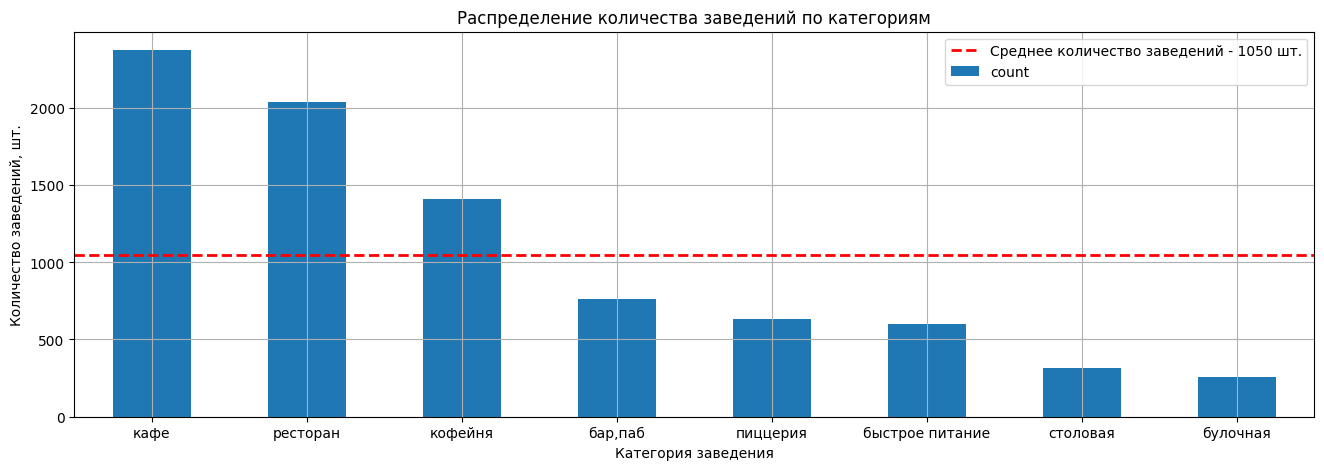

In [30]:
# Высчитываем количество заведений в разрезе их категорий
grouped = df['category'].value_counts().sort_values(ascending=False)

# Строим столбчатую диаграмму
grouped.plot(kind='bar',
             figsize=(16, 5),
             title='Распределение количества заведений по категориям',
             xlabel='Категория заведения',
             ylabel='Количество заведений, шт.',
             rot=0,
             legend=True)

# Рассчитываем среднее значение количества заведений по их категориям
mean_num_rest = int(round(df['category'].value_counts().mean(), 0))

# Наносим на график линию с средним значением количества заведений
plt.axhline(mean_num_rest,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Среднее количество заведений - {mean_num_rest} шт.')


plt.grid()
plt.legend()

# Выводим график
plt.show()

Согласно данным видно, что наибольшую долю среди всех заведений общественного питания занимают: `кафе` - 2376 шт. (28.3% данных), `рестораны` - 2042 шт. (24.3%) и `кофейни` - 1413 шт. (16.8%). Бары и пабы, пиццерии и заведения быстрого питания расположились на промежуточной позиции и занимаю долю в диапазоне от 7.2% до 9.1%. Меньше всего заведений - это столовых и булочных, их доля составляет 3.7% и 3.0% соответственно.

<a id="id10"></a>
### Исследование распределения заведений по районам Москвы
В этом разделе проведем исследование распределения количества заведений по всем районам Москвы, так же рассмотрим, как происходит распределение заведений центральном районе.

Рассмотрим, какие административные районы Москвы присутствуют в данных.

In [31]:
# Посчитаем количество уникальных значений районов Москвы
num = df['district'].sort_values().nunique()

# Выведем районы Москвы, имеющиеся в датасете
display(df['district'].sort_values().unique())
print(f'Количество уникальных значений - {num}')

array(['восточный административный округ',
       'западный административный округ',
       'северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'центральный административный округ',
       'юго-восточный административный округ',
       'юго-западный административный округ',
       'южный административный округ'], dtype=object)

Количество уникальных значений - 9


Проведем анализ распределения количества заведений по административным районам Москвы.

In [32]:
# Выведем количество заведений и их долю по каждому району Москвы
display(abs_rel_values(df, 'district'))

,Количество,Доля (%)
district,,
центральный административный округ,2242,26.7
северный административный округ,898,10.7
южный административный округ,892,10.6
северо-восточный административный округ,890,10.6
западный административный округ,850,10.1
восточный административный округ,798,9.5
юго-восточный административный округ,714,8.5
юго-западный административный округ,709,8.4
северо-западный административный округ,409,4.9


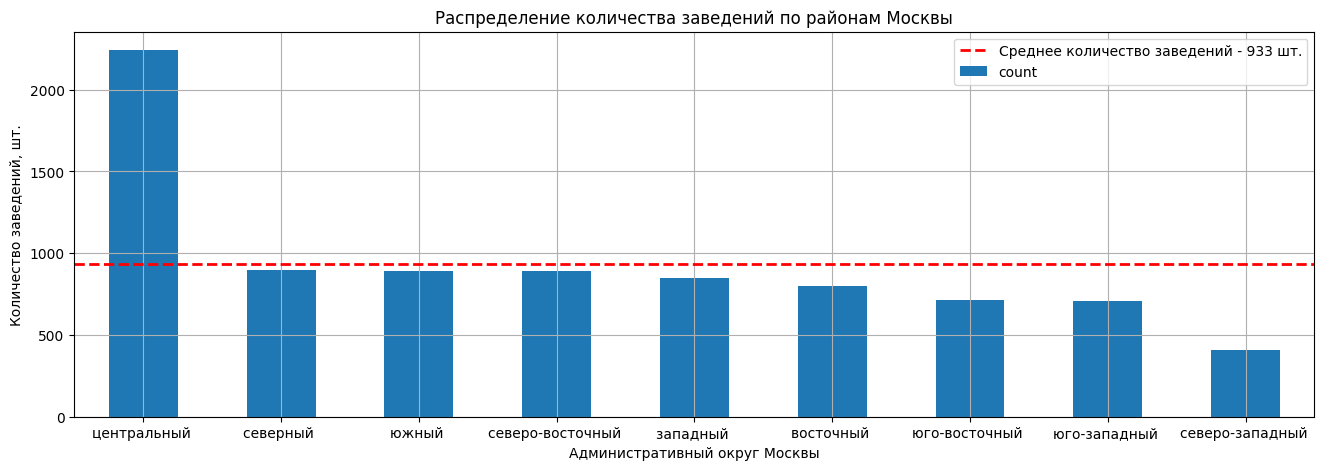

In [33]:
# Высчитываем количество заведений в разрезе районов
grouped = df['district'].value_counts().sort_values(ascending=False)

# Удалим из наименований (индексов) столбцов слово "административный округ"
grouped.index = grouped.index.str.replace('административный округ', '')

# Строим столбчатую диаграмму
grouped.plot(kind='bar',
             figsize=(16, 5),
             title='Распределение количества заведений по районам Москвы',
             xlabel='Административный округ Москвы',
             ylabel='Количество заведений, шт.',
             rot=0,
             legend=True)

# Рассчитываем среднее значение количества заведений по районам
mean_num_rest = int(df['district'].value_counts().mean())

# Наносим на график линию с средним значением количества заведений
plt.axhline(mean_num_rest,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Среднее количество заведений - {mean_num_rest} шт.')


plt.grid()
plt.legend()

# Выводим график
plt.show()

Из графика видно, что наибольшее количество заведений с явным отрывом сосредоточено в `центральном районе` (2242 шт, 26.7%), напротив, в `северо-западном административном округе` сосредоточено наименьшее количество - 409 шт. (4.9%). `Остальные районы` имеют приблизительно одинаковое количество заведений: 709 шт. - 898 шт. (8.4% - 11.7%).

Теперь рассмотрим, как распределяются заведения в центральном районе Москвы в разрезе их категорий.

In [34]:
# Создадим отфильтрованный датасет по центральному району
df_central = df[df['district'].str.contains('центральный', case=False, na=False)]

# Выведем количество заведений и их долю в разрезе категорий
# в центральном районе Москвы
display(abs_rel_values(df_central, 'category'))

,Количество,Доля (%)
category,,
ресторан,670,29.9
кафе,464,20.7
кофейня,428,19.1
"бар,паб",364,16.2
пиццерия,113,5.0
быстрое питание,87,3.9
столовая,66,2.9
булочная,50,2.2


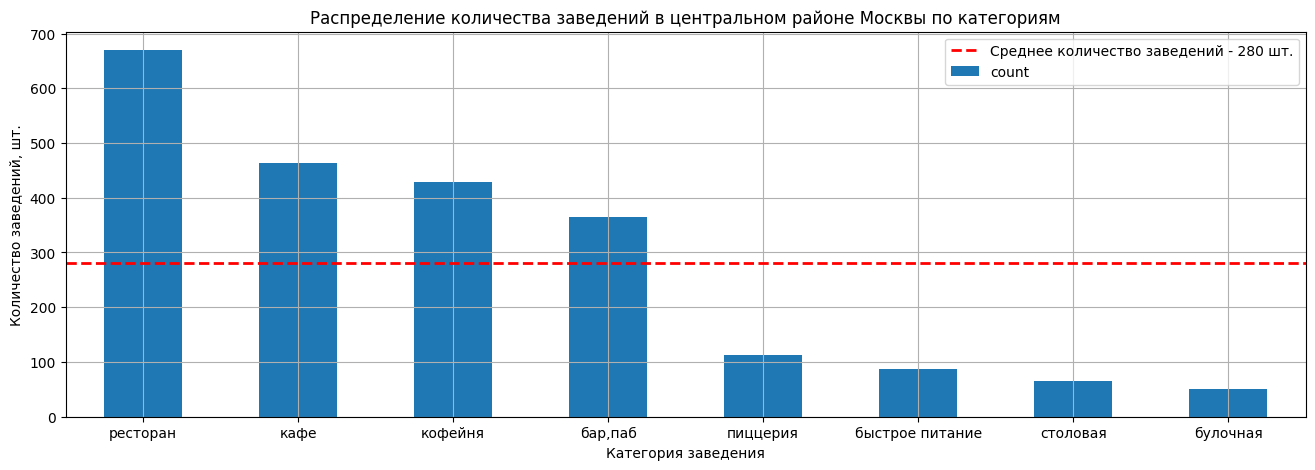

In [35]:
# Высчитываем количество заведений в центральном районе Москвы
# в разрезе их категорий
grouped = df_central['category'].value_counts().sort_values(ascending=False)

# Строим столбчатую диаграмму
grouped.plot(kind='bar',
             figsize=(16, 5),
             title='Распределение количества заведений в центральном районе Москвы по категориям', 
             xlabel='Категория заведения',
             ylabel='Количество заведений, шт.',
             rot=0,
             legend=True)

# Рассчитываем среднее значение количества заведений по их категориям
mean_num_rest = int(round(df_central['category'].value_counts().mean(), 0))

# Наносим на график линию с средним значением количества заведений
plt.axhline(mean_num_rest,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Среднее количество заведений - {mean_num_rest} шт.')


plt.grid()
plt.legend()

# Выводим график
plt.show()

По полученным данным видно, что наибольшее количество заведений общественного питания в центральном районе Москвы принадлежит к категории `ресторан` (670 шт., 29.9% данных), `кафе` - 464 шт. (20.7%), `кофейня` - 428 шт. (19.1%) и `бар, паб` - 364 шт. (16.2%).

<a id="id11"></a>
### Исследование количества сетевых и несетевых заведений
В этом разделе изучим соотношение сетевых и несетевых заведений по всем данным и в разрезе каждой категории заведения. Определим, какие категории заведения чаще являются сетевыми.

Изучим соотношение сетевых и несетевых заведений по всем данным.

In [36]:
abs_rel_values(df, 'chain')

,Количество,Доля (%)
chain,,
False,5199,61.9
True,3203,38.1


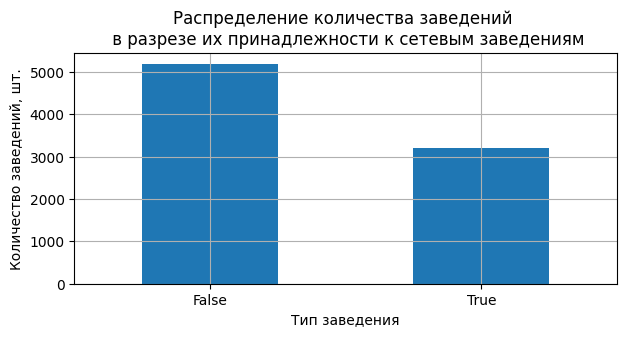

In [37]:
# Высчитываем количество сетевых и не сетевых заведений
grouped = df['chain'].value_counts().sort_values(ascending=False)

# Строим столбчатую диаграмму
grouped.plot(kind='bar',
             figsize=(7, 3),
             title='Распределение количества заведений \n в разрезе их принадлежности к сетевым заведениям',
             xlabel='Тип заведения',
             ylabel='Количество заведений, шт.',
             rot=0)

plt.grid()

# Выводим график
plt.show()

Из всех заведений общественного питания более половины не являются сетевыми (5199 шт., 61.9%), количество сетевых - 3203 шт. (38.1%).

Изучим соотношение сетевых и несетевых заведений в разрезе категорий заведения.

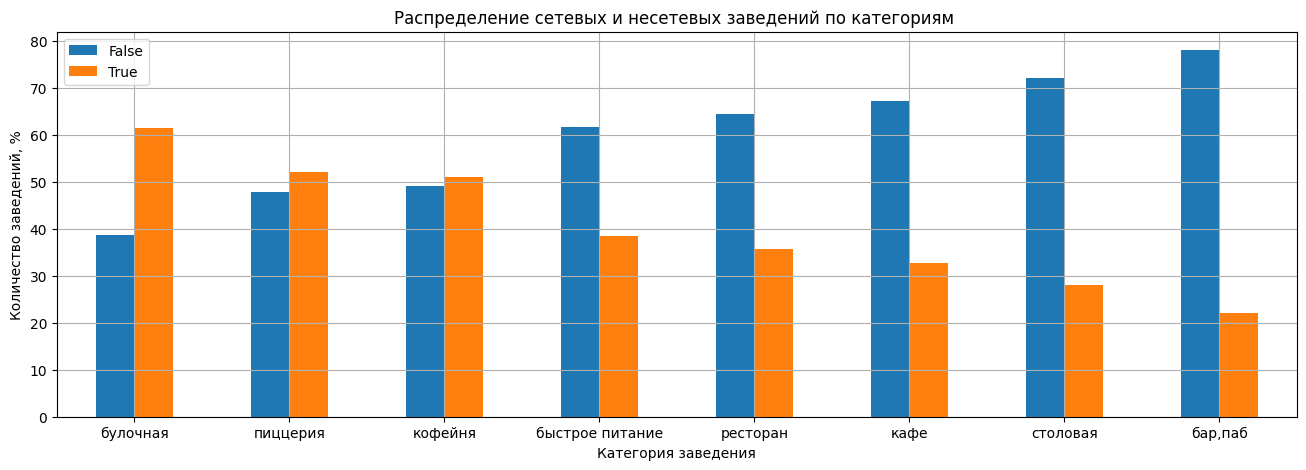

In [38]:
# Для каждой категории высчитаем относительное количество сетевых (True)
# и несетевых (False) заведений
grouped = df.groupby('category')['chain'].value_counts(normalize=True) * 100 
grouped = grouped.unstack(fill_value=0).sort_values(by=True, ascending=False)

# Построим график столбчатой диаграммы
grouped.plot(kind='bar',
               figsize=(16, 5),
               title='Распределение сетевых и несетевых заведений по категориям ',
               ylabel='Количество заведений, %',
               xlabel='Категория заведения',
               rot=0)
plt.grid()
plt.legend()


plt.show()

Выведем количество заведений в разрезе их принадлежности к сетевым заведениям и в разрезе категорий заведения.

In [39]:
# Создадим сводную таблицу
df_table = pd.pivot_table(df,
              index='category',
              columns='chain',
              values='id',
              aggfunc='count')

# Заменим названия столбцов
df_table.columns = ['несетевые', 'сетевые']

# Высчитаем долю сетевых
df_table['доля сетевых, %'] = round(df_table['сетевые'] * 100
                                    / (df_table['несетевые'] + df_table['сетевые'])
                                    , 1)

# Отсортируем датафрейм по уменьшению доли сетевых заведений
df_table.sort_values(by='доля сетевых, %', ascending=False)

,несетевые,сетевые,"доля сетевых, %"
category,,,
булочная,99,157,61.3
пиццерия,303,330,52.1
кофейня,693,720,51.0
быстрое питание,371,232,38.5
ресторан,1313,729,35.7
кафе,1597,779,32.8
столовая,227,88,27.9
"бар,паб",596,168,22.0


Наиболее часто заведения, имеющие категории: `булочная`, `пиццерия` и `кофейня`, являются сетевыми. Для них доля заведений, которые являются сетевыми, относительно всех заведений в этой категории составляет `61.3%`, `52.1%` и `51.0%` соответственно. Для категорий `быстрое питание`, `ресторан` и `кафе` данная доля составляет `32.8% - 38.5%`, для `столовая` и `бар, паб` - `27.9%` и `22.0%` соответственно.

<a id="id12"></a>
### Исследование количества посадочных мест
В данном разделе изучим, какое количество посадочных мест типично для каждой категории заведения, определим максимальную и медианную вместительность заведения.

In [40]:
# Отфильтруем датасет, оставив только строки, 
# в которых есть информация про количество посадочных мест
df_seats = df[df['seats'] != -1]

In [41]:
# Проверим корректность фильтрации
df_seats.shape

(4656, 14)

Фильтрация проведена корректно. Теперь выведем основные статистики датафрейма и построим гистограмму распределения посадочных мест и диаграмму размаха.

In [42]:
df_seats['seats'].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99])

count    4656.000000
mean      111.526632
std       123.197930
min         1.000000
1%          4.000000
25%        40.000000
50%        78.000000
75%       141.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

`Среднее значение` (`112` шт.) посадочных мест значительно отличается от `медианного` (`78` шт.), что может говорить о том, что в данных могут присутствовать аномально высокие значения. Это подтверждается тем, что максимальное значение посадочных мест равняется `1288` шт, а `99` процентиль равен `625`. Так же с другой стороны минимальное значение равно `1`, а `1` процентиль равен `4`. Необходимо отфильтровать данные по 1 и 99 процентилю, чтобы избежать смещения статистик и гистограмм из-за аномальных значений.

Проведем фильтрацию данных по 1 и 99 процентилю.

In [43]:
# Отфильтруем датасет по 1 и 99 процентилю
df_seats = df_seats[
    (df_seats['seats'] > df_seats['seats'].quantile(0.01)) & 
    (df_seats['seats'] < df_seats['seats'].quantile(0.99))
]

# Проверим корректность фильтрации
df_seats.shape

(4546, 14)

Значения отфильтрованы.
Построим гистограмму распределения количества посадочных мест.

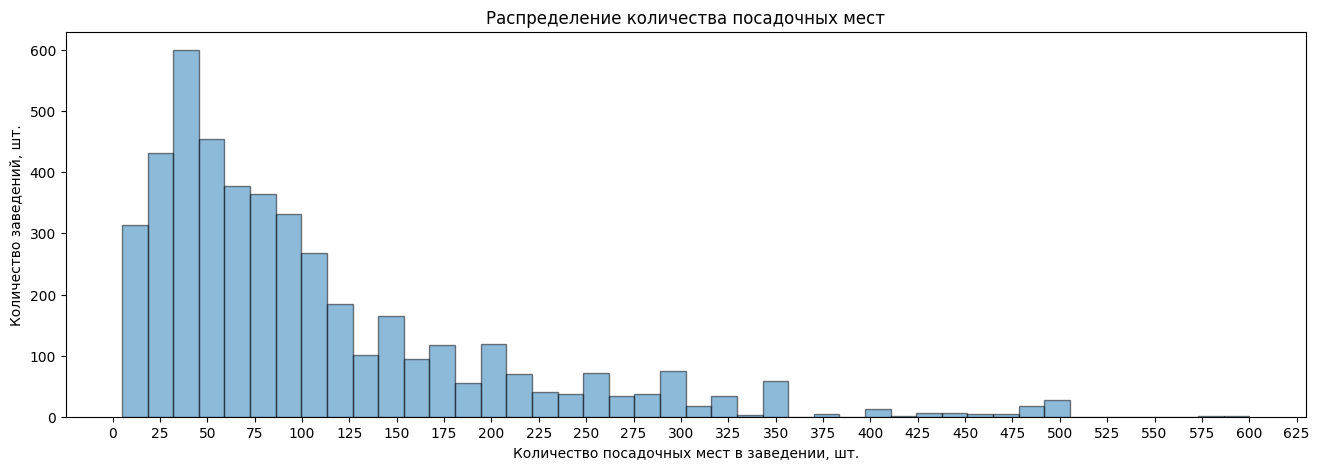

In [44]:
# Создадим гистограмму распределения посадочных мест
plt.figure(figsize=(16, 5))

df_seats['seats'].plot(
        kind='hist',
        bins=44,
        edgecolor='black',
        alpha=0.5)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест в заведении, шт.')
plt.ylabel('Количество заведений, шт.')

# Увеличим количество меток на оси Х
plt.locator_params(axis='x', nbins=30)

plt.show()

Гистограмма является ассиметричной и скошена вправо. Наиболее типичное количество посадочных мест в заведениях не превосходит 100 единиц. По гистограмме видно, что когда количество мест превосходит 350 единиц, количество таких заведений значительно падает и исчисляется единицами. Можно предположить, что количество посадочных мест свыше 350 связано с опечатками в данных или с нетипичными заведениями. 

Построим, что покажет диаграмма размаха.

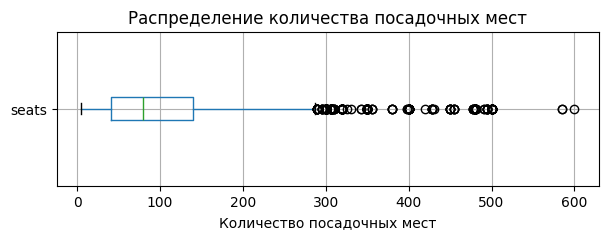

In [45]:
# Создадим диаграмму размаха
plt.figure(figsize=(7,2))

df_seats.boxplot(column='seats', vert=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.show()

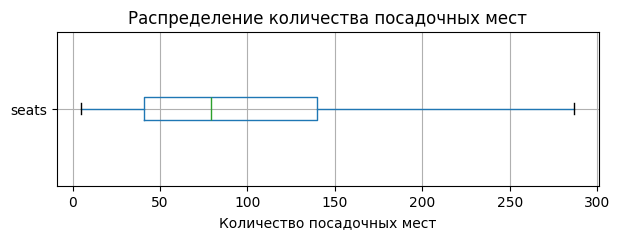

In [46]:
# Создадим диаграмму размаха, отфильтровав выбросы
plt.figure(figsize=(7,2))

df_seats.boxplot(column='seats', vert=False, showfliers=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.show()

По диаграмме размаха видно, что выбросы начинаются после значения ~280. Наиболее типичное количество посадочных мест находится примерно в диапазоне от 40 до 140 шт.

Так как у нас гистограмма ассиметричная и скошенная вправо, о выбросах будем судить по ней. Как и говорилось ранее, если количество мест превышает 350 единиц будем считать такие данные аномальными.

Исследуем теперь распределение количества посадочных мест по категориям.

In [47]:
# Посмотрим на основные статистики количества посадочных мест
# сгрупированных по категории заведения
df_seats.groupby('category')['seats'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ресторан,1229.0,117.502848,96.499486,5.0,50.0,90.0,150.0,500.0
"бар,паб",454.0,110.958150,95.658981,6.0,48.0,80.0,140.0,585.0
кофейня,705.0,105.228369,90.436255,5.0,42.0,80.0,144.0,500.0
столовая,156.0,93.141026,76.702647,6.0,40.0,78.0,117.0,428.0
быстрое питание,316.0,105.806962,93.419063,5.0,40.0,75.5,150.0,500.0
булочная,131.0,96.076336,87.059628,6.0,35.5,70.0,132.5,478.0
кафе,1145.0,94.939738,91.032274,5.0,40.0,60.0,120.0,600.0
пиццерия,410.0,90.682927,85.376439,5.0,30.0,55.5,120.0,455.0


Посмотрим на гистограммы распределения количества посадочных мест по каждой категории.

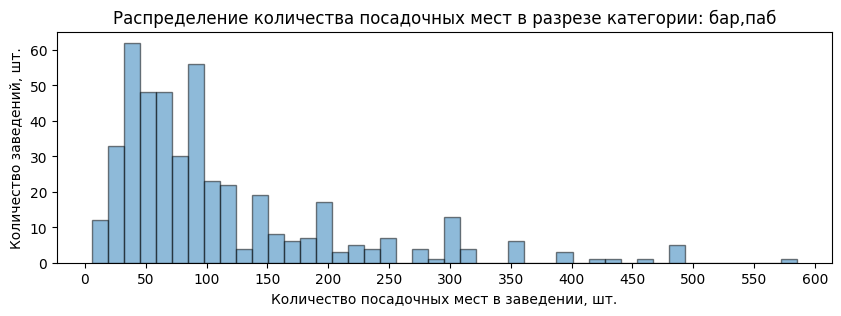

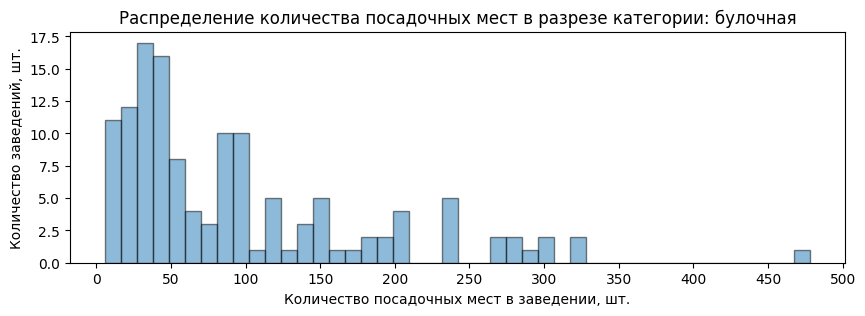

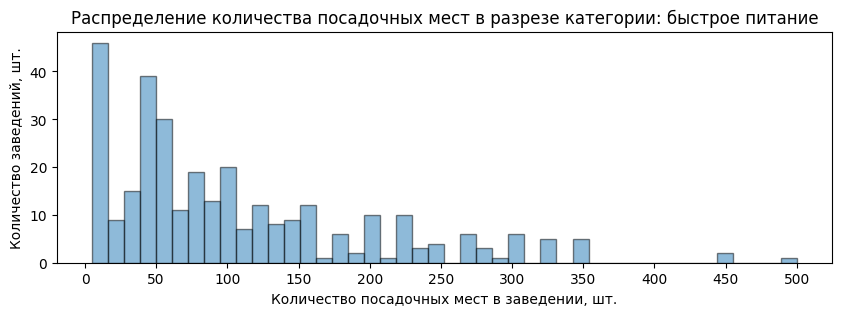

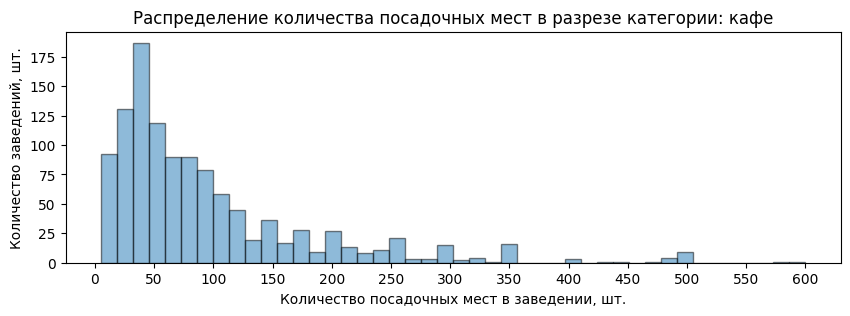

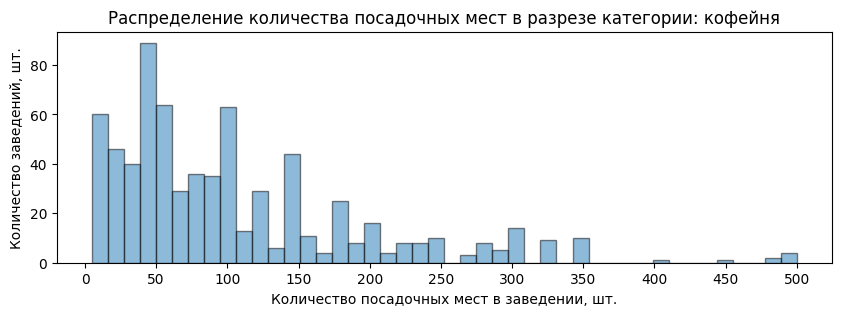

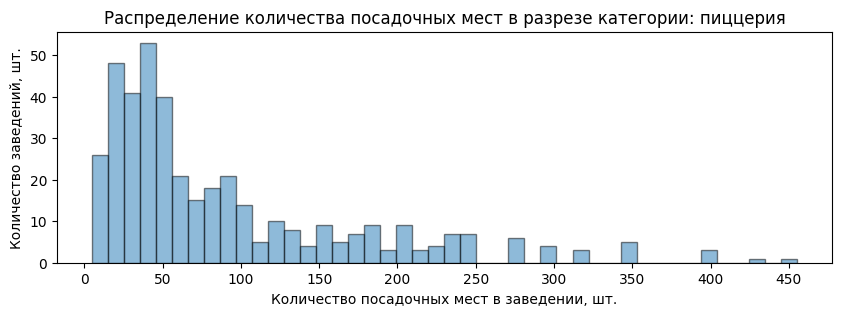

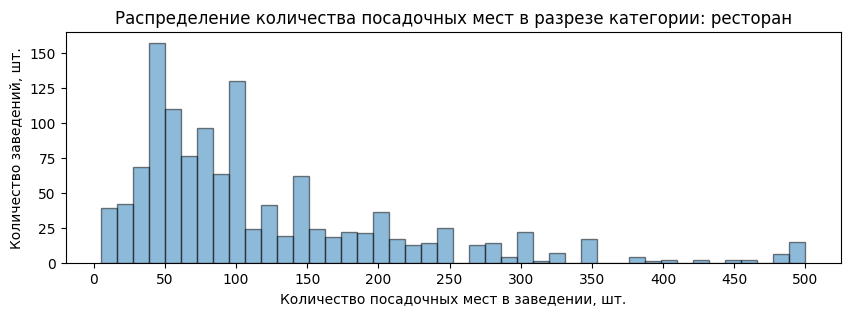

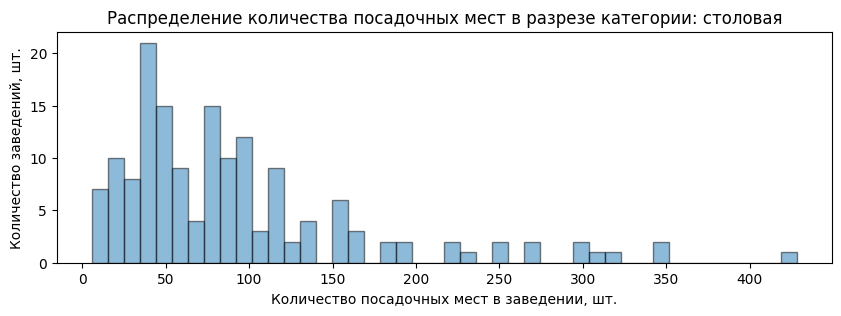

In [48]:
# Создадим список со всеми категориями заведений
columns = df_seats['category'].unique().tolist()

# Отсортируем значения в алфавитном порядке
columns.sort()


# По каждой категории создадим гистограмму распределения
# количества посадочных мест
for column in columns:
    plt.figure(figsize=(10, 3))
    df_seats[df_seats['category'] == column]['seats'].plot(
            kind='hist',
            bins=44,
            edgecolor='black',
            alpha=0.5)
    
    # Увеличим количество меток на оси Х
    plt.locator_params(axis='x', nbins=15)
    
    plt.title(f'Распределение количества посадочных мест в разрезе категории: {column}')
    plt.xlabel('Количество посадочных мест в заведении, шт.')
    plt.ylabel('Количество заведений, шт.')
    plt.show()

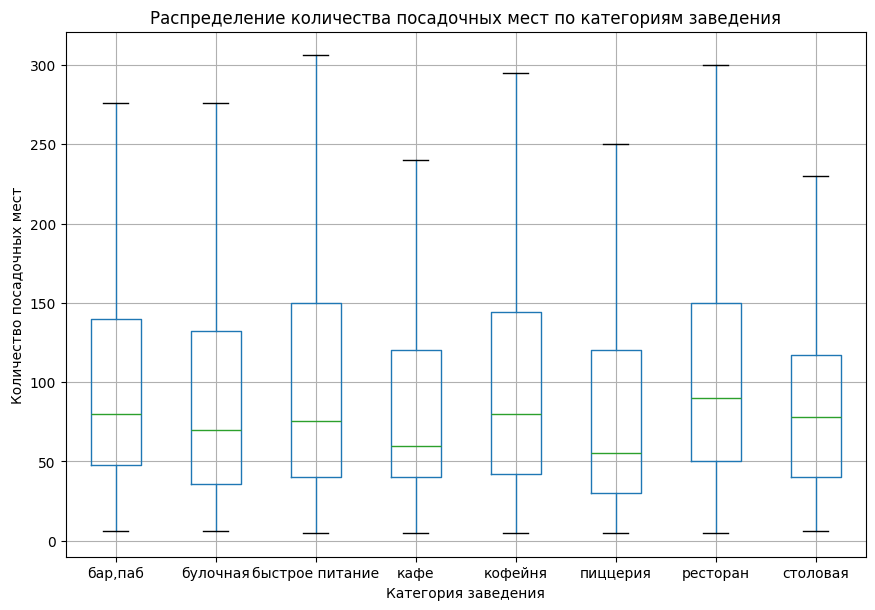

In [49]:
# По каждой категории создадим диаграмму размаха
# по количеству посадочных мест, отфильтровав выбросы
df_seats.boxplot(column='seats', by='category', vert=True, showfliers=False, figsize=(10, 7), )

plt.title('Распределение количества посадочных мест по категориям заведения')
plt.suptitle('')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.show()

По полученным статистикам и гистограммам можно сделать следующие выводы:
- **Категория: бар, паб**
    - Наиболее типичное количество посадочных мест: `50 - 140 шт.`
    - Медианное количество посадочных мест: `80 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `420 шт.`
- **Категория: булочная**
    - Наиболее типичное количество посадочных мест: `40 - 130 шт.`
    - Медианное количество посадочных мест: `70 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `220 шт.`
- **Категория: быстрое питание**
    - Наиболее типичное количество посадочных мест: `40 - 150 шт.`
    - Медианное количество посадочных мест: `75 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `350 шт.`
- **Категория: кафе**
    - Наиболее типичное количество посадочных мест: `40 - 120 шт.`
    - Медианное количество посадочных мест: `60 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `350 шт.`
- **Категория: кофейня**
    - Наиболее типичное количество посадочных мест: `40 - 145 шт.`
    - Медианное количество посадочных мест: `80 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `320 шт.`
- **Категория: пиццерия**
    - Наиболее типичное количество посадочных мест: `30 - 120 шт.`
    - Медианное количество посадочных мест: `55 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `350 шт.`
- **Категория: ресторан**
    - Наиболее типичное количество посадочных мест: `50 - 150 шт.`
    - Медианное количество посадочных мест: `90 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `350 шт.`
- **Категория: столовая**
    - Наиболее типичное количество посадочных мест: `40 - 120 шт.`
    - Медианное количество посадочных мест: `80 шт.`
    - Максимальное количество пасадочных мест для данной категории заведения: примерно `200 шт.`


<a id="id13"></a>
### Исследование рейтинга заведений
В данном разделе проведем анализ рейтинга заведений по всем данным, найдем усредненный рейтинг по каждой категории заведения.

Исследуем распределение рейтинга. Ознакомимся с основными статистиками датасета по столбцу `rating`.

In [50]:
df['rating'].describe()

count    8402.000000
mean        4.230016
std         0.470318
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Медианное значени (4.3) достаточно близко к среднему (4.2), что говорит о том, что распределение значений достаточно близко к нормальному распределению.

Построим гистограмму распределения.

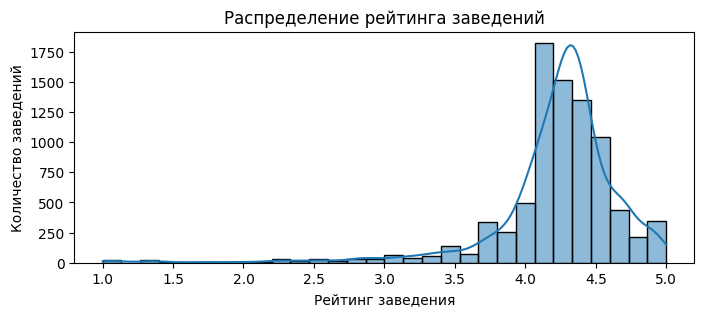

In [51]:
# Создадим гистограмму распределения рейтинга заведений
plt.figure(figsize=(8, 3))

sns.histplot(
    df,
    x='rating',
    bins=30,
    kde=True
)

plt.title('Распределение рейтинга заведений')
plt.xlabel('Рейтинг заведения')
plt.ylabel('Количество заведений')

plt.show()


Распределение приближено к нормальному распределению, имеется небольшая ассиметрия в виде левого хвоста.
Наибольшее количество значений сосредоточено в диапазоне 3.9 - 4.7.

Рассчитаем средний рейтинг заведений по категориям и построим столбчатую диаграмму.

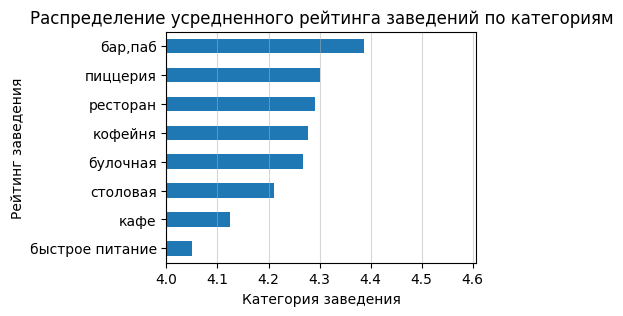

In [66]:
# Рассчитаем средний рейтинг заведений по категориям
grouped = df.groupby('category')['rating'].mean().sort_values()

# Построим столбчатую диаграмму
plt.figure(figsize=(4, 3))

grouped.plot(kind='barh',
             title='Распределение усредненного рейтинга заведений по категориям',
             xlabel='Категория заведения',
             ylabel='Рейтинг заведения',
             rot=0)

plt.xlim(left=4)
plt.grid(axis='x', alpha=0.5)
plt.show()

In [53]:
# Выведем средний рейтинг заведений по категориям и посчитаем
# какое количество строк попало в выборку
grouped = (
    df.groupby('category')['rating']
    .agg(['mean', 'count'])
    .sort_values(by='mean', ascending=False)
)
grouped['mean'] = grouped['mean'].round(2)
grouped

,mean,count
category,,
"бар,паб",4.39,764
пиццерия,4.30,633
ресторан,4.29,2042
кофейня,4.28,1413
булочная,4.27,256
столовая,4.21,315
кафе,4.12,2376
быстрое питание,4.05,603


В целом все категории имеют достаточно высокий рейтинг - выше 4.0. Самый низкий усредненный рейтинг имеют категории: `кафе` и `быстрое питание`, рейтинг для них составил 4.1. Самый высокий рейтинг имеет категория `бар, паб` - 4.39.

<a id="id14"></a>
### Исследования взаимосвязи данных
В этом разделе проанализируем какие параметры больше всего коррелируют с рейтингом заведения, определим самые сильные связи и изучим их.

interval columns not set, guessing: ['rating', 'seats', 'middle_avg_bill']


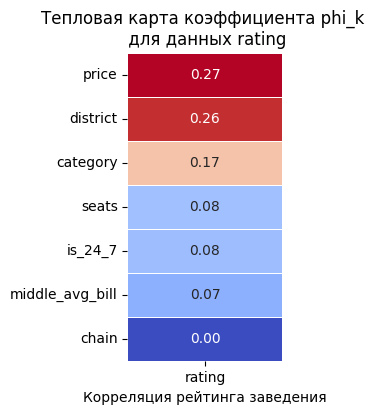

In [54]:
# Отфильтруем датасет, уберем из него строки, 
# в которых имеются индикаторы-пустот
df_filtered = df[
    (df['middle_avg_bill'] != -1) &
    (df['seats'] != -1) &
    (df['price'] != 'unknown')
]

# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_filtered[['category', 'district', 'rating', 'chain', 'seats', 'price', 'middle_avg_bill', 'is_24_7']].phik_matrix()

# Оставим только столбец с 'rating', уберем из строк 'rating'
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

plt.figure(figsize=(2, 4))

sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Корреляция рейтинга заведения')

# Выводим график
plt.show()

Метод phik установил, что имеется слабая корреляционная связь между столбцом `rating` и двумя другими столбцами: `price` и `district`.

Построим диаграммы размаха и посмотрим, как распределится рейтинг по различным категориям данных.

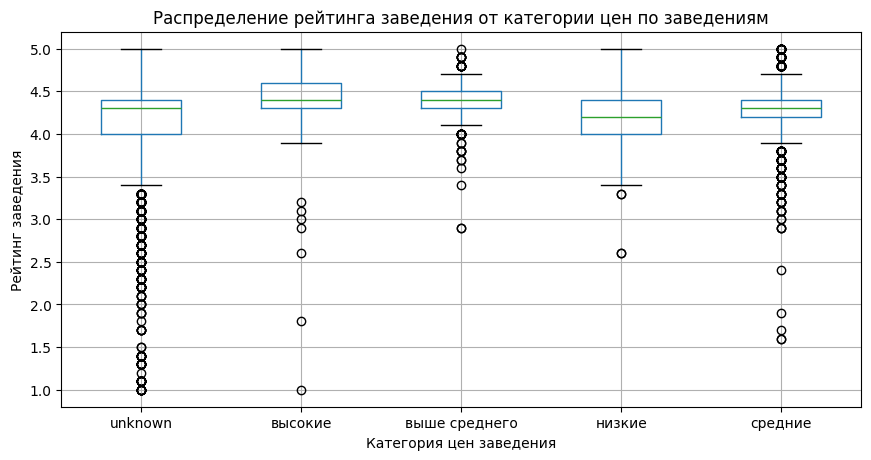

In [55]:
# Строим диаграмму размаха для rating и price
df.boxplot(column='rating', by='price', vert=True, showfliers=True, figsize=(10, 5))

plt.title('Распределение рейтинга заведения от категории цен по заведениям')
plt.suptitle('')
plt.ylabel('Рейтинг заведения')
plt.xlabel('Категория цен заведения')
plt.show()

In [56]:
# Выведем основные статистики
df.groupby('price')['rating'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
price,,,,,,,,
высокие,478.0,4.436611,0.314197,1.0,4.3,4.4,4.6,5.0
выше среднего,564.0,4.386347,0.223507,2.9,4.3,4.4,4.5,5.0
unknown,5087.0,4.166778,0.545211,1.0,4.0,4.3,4.4,5.0
средние,2117.0,4.297874,0.295653,1.6,4.2,4.3,4.4,5.0
низкие,156.0,4.173077,0.372671,2.6,4.0,4.2,4.4,5.0


По данным видно, что с увеличением стоимости среднего чека рейтинг заведений имеет более высокое значение. У заведений, цены которых относятся к категории "низкие", наблюдается наибольшая вариативность рейтинга. Это может быть связано с тем, что много заведений с низкими ценами предоставляет низкое качество обслуживания. Так же стоит взять во внимание, что в датасет вошло только 156 заведений с "низкими" ценами. При увеличении полноты данных, медианный рейтинг и само распределение может сдвинуться в сторону более низкого рейтинга.

Рассмотрим теперь зависимость рейтинга от региона. Построим диаграмму размаха.

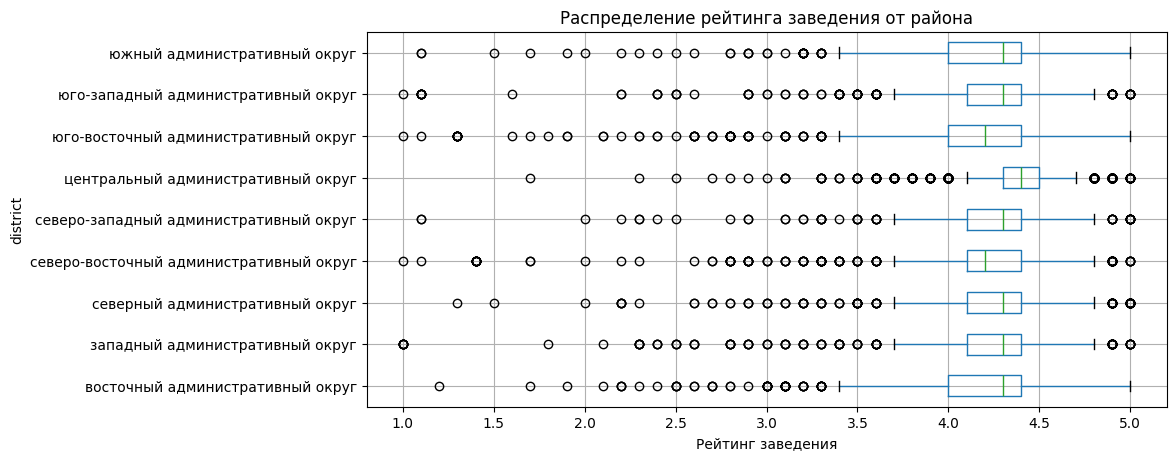

In [57]:
# Строим диаграмму размаха для rating и district
df.boxplot(column='rating', by='district', vert=False, showfliers=True, figsize=(10, 5))

plt.title('Распределение рейтинга заведения от района')
plt.suptitle('')
plt.xlabel('Рейтинг заведения')
plt.show()

In [58]:
# Выведем основные статистики
df_filtered.groupby('district')['rating'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
центральный административный округ,562.0,4.408541,0.219702,3.1,4.3,4.4,4.5,5.0
восточный административный округ,116.0,4.286207,0.259731,3.0,4.2,4.3,4.4,4.9
западный административный округ,157.0,4.280892,0.354121,1.8,4.1,4.3,4.4,4.9
северо-восточный административный округ,151.0,4.247020,0.325946,1.7,4.1,4.3,4.4,4.9
северный административный округ,196.0,4.290306,0.241062,3.2,4.2,4.3,4.4,5.0
северо-западный административный округ,85.0,4.272941,0.323444,2.9,4.2,4.3,4.4,5.0
юго-восточный административный округ,82.0,4.271951,0.328210,3.0,4.2,4.3,4.4,5.0
юго-западный административный округ,142.0,4.298591,0.328544,1.6,4.2,4.3,4.4,4.9
южный административный округ,171.0,4.253801,0.314783,2.4,4.1,4.3,4.4,5.0


Среди всех районов выделяется `центральный административный округ`, он имеет наименьшую вариативность и более высокое значение медианного рейтинга (4.4). Остальные районы имеют сопоставивый рейтинг, однако наблюдается высокая вариативность рейтинга, особенно для следующих административных округов: `южный`, `северо-восточный` и `западный`, что может говорить о том, что в них сосредоточено много заведений, имеющих как высокий рейтинг, так и низкий.

<a id="id15"></a>
### Исследование рейтинга топ-15 сетевых заведений
В этом разделе определим топ-15 сетевых заведений по количеству заведений в датасете, определим, к каким категориям они относятся, и высчитаем средний их рейтинг.

Найдем топ-15 популярных сетей в Москве.

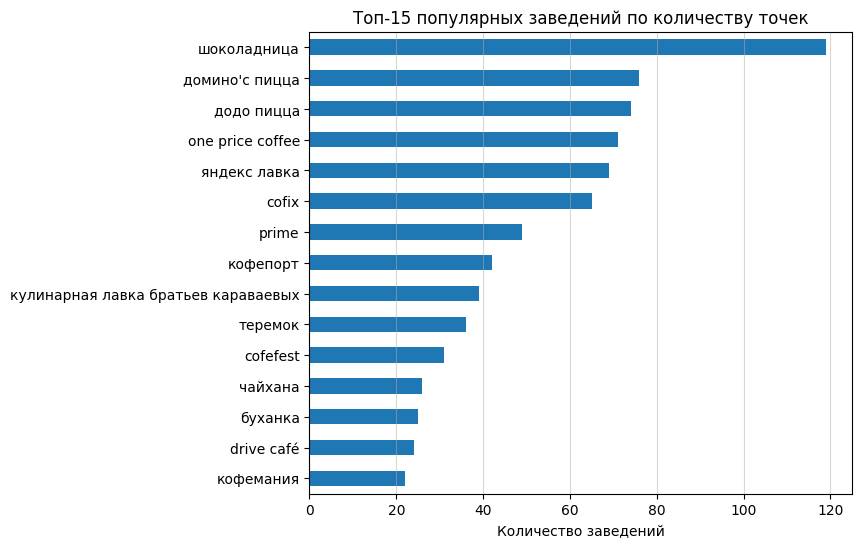

In [59]:
# Выведем топ-15 популярных заведений в Москве (по их количеству)
# Отфильтруем датасет от несетевых заведений
df_group_top_15 = (
    df[df['chain'] == True]
    .groupby(['name', 'category'])['name']
    .count()
    .sort_values(ascending=False)
    .head(15)
    .rename('count') # Назовем правильно высчитанный столбец
    .reset_index() # Выведем индексы в столбцы
)

# Отсортируем датасет по количеству заведений
df_group_top_15 = df_group_top_15.sort_values(by='count', ascending=True)

# Построим линейчатую диаграмму
df_group_top_15.plot(
    figsize=(7, 6),
    kind='barh',
    x='name',
    y='count',
    title='Топ-15 популярных заведений по количеству точек',
    xlabel='Количество заведений',
    ylabel='',
    rot=0
    ,legend=False)


plt.grid(axis='x', alpha=0.5)
plt.show()

Подсчитаем для топ-15 сетей значение среднего рейтинга.

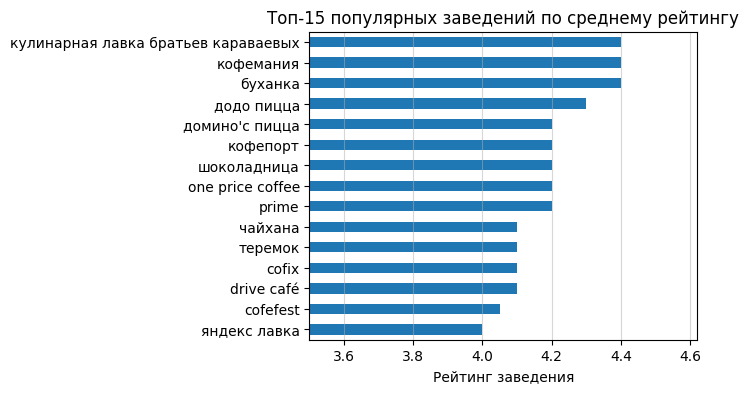

In [73]:
# Создадим список с топ-15 заведениями
top_15_list = df_group_top_15['name'].unique().tolist()

# Отфильтруем датасет, оставив в нем только
# Заведения из топ-15
df_top_15 = df[df['name'].isin(top_15_list)]

# Сгрупируем строки по заведениям и посчитаем для них медианный рейтинг
top_15_rating = df_top_15.groupby('name')['rating'].median().sort_values(ascending=True)

# Построим линейчатую диаграмму
top_15_rating.plot(
    kind='barh',
    figsize=(5, 4),
    title='Топ-15 популярных заведений по среднему рейтингу',
    xlabel='Рейтинг заведения',
    ylabel='',
    rot=0)

plt.xlim(left=3.5)
plt.grid(axis='x', alpha=0.5)
plt.show()

In [61]:
# Переведем серию в датасет
top_15_rating.reset_index()

# Объединим два датасета по 'name'
df_top_15_info = pd.merge(df_group_top_15, top_15_rating, on='name', how='inner')

# Переведем в индекс столбец 'name'
# И отсортируем по рейтингу
df_top_15_info.set_index('name').sort_values(by='rating', ascending=False)

,category,count,rating
name,,,
кофемания,кофейня,22,4.40
буханка,булочная,25,4.40
кулинарная лавка братьев караваевых,кафе,39,4.40
додо пицца,пиццерия,74,4.30
prime,ресторан,49,4.20
кофепорт,кофейня,42,4.20
one price coffee,кофейня,71,4.20
домино'с пицца,пиццерия,76,4.20
шоколадница,кофейня,119,4.20


Среди топ-15 заведений общественного питания, отобранных по количеству заведений, выделяются `кофемания`, `буханка` и `кулинарная лавка братьев караваевых` - у них самых высокий рейтинг среди всех и составляет 4.4 балла. Минимальный рейтинг заведения, вошедшего в топ-15 составляет 4.0 (`яндекс лавка`).

<a id="id16"></a>
### Исследование влияния расположения заведения на среднюю стоимость чека
В этом разделе изучим среднюю стоимость чека заведения, его вариацию в зависимости от района Москвы. Определим, как удаленность от центра влияет на цены в заведениях.

In [62]:
# Отсортируем датасет по полю 'middle_avg_bill' от строк-индикаторов,
# указывающих на отсутствие данных
df_mab = df[df['middle_avg_bill'] != -1]

# Проверим корректность фильтрации
df_mab.shape

(3148, 14)

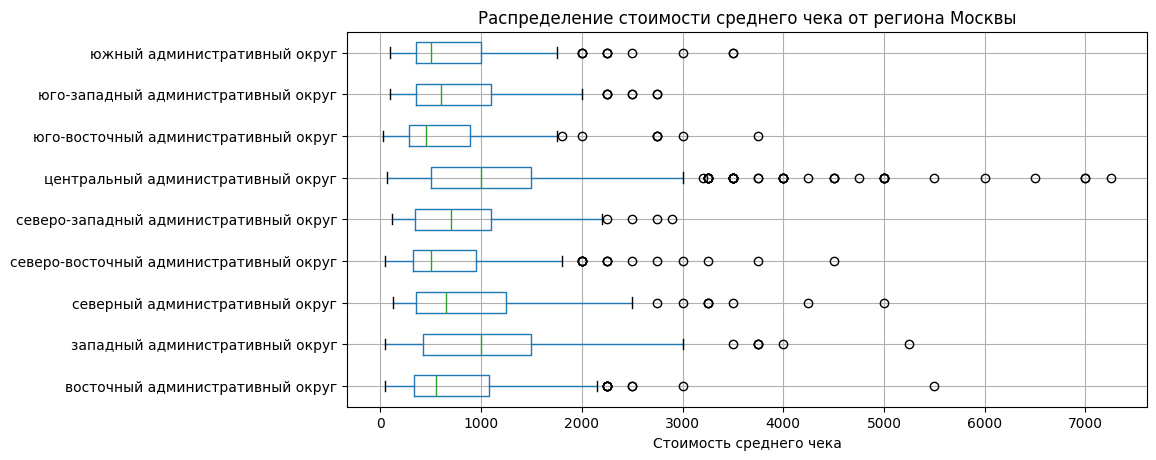

In [75]:
# Построим диаграмму размаха по районам Москвы и среднему чеку заведений
df_mab.boxplot(column='middle_avg_bill', by='district', vert=False, showfliers=True, figsize=(10, 5))

plt.title('Распределение стоимости среднего чека от региона Москвы')
plt.suptitle('')
plt.xlabel('Стоимость среднего чека')
plt.ylabel('')
plt.show()

В `южном`, `северном` и `восточном` административных районах наблюдается явные аномальные значения. Уберем их из датасета, чтобы корректно подсчитать статистики.

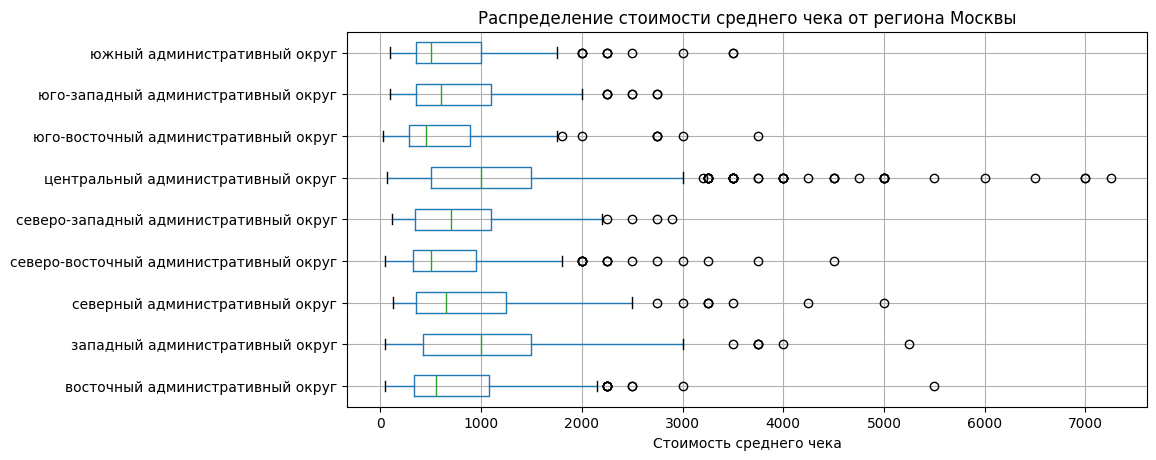

In [64]:
# Отфильтруем датасет
df_mab = df_mab[df_mab['middle_avg_bill'] < 9500]

# Построим диаграмму размаха
df_mab.boxplot(column='middle_avg_bill', by='district', vert=False, showfliers=True, figsize=(10, 5))

plt.title('Распределение стоимости среднего чека от региона Москвы')
plt.suptitle('')
plt.xlabel('Стоимость среднего чека')
plt.ylabel('')
plt.show()

In [65]:
# Выведем основные статистики стоимости среднего чека
# сгрупированных по районам Москвы
print('Сортировка по стандартному отклонению')
display(df_mab.groupby('district')['middle_avg_bill'].describe().sort_values(by='std', ascending=False))

print()
print()

print('Сортировка по медианной стоимости среднего чека')
display(df_mab.groupby('district')['middle_avg_bill'].describe().sort_values(by='50%', ascending=False))

Сортировка по стандартному отклонению


,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
центральный административный округ,1059.0,1192.182251,919.718994,67.0,500.00,1000.0,1500.0,7250.0
западный административный округ,306.0,1053.225464,779.008423,50.0,427.50,1000.0,1500.0,5250.0
северный административный округ,321.0,896.582581,719.341248,130.0,350.00,650.0,1250.0,5000.0
восточный административный округ,259.0,785.185303,631.656067,50.0,337.00,550.0,1080.0,5500.0
северо-западный административный округ,157.0,822.222900,595.055176,120.0,340.00,700.0,1100.0,2900.0
северо-восточный административный округ,301.0,716.611267,591.232117,50.0,325.00,500.0,950.0,4500.0
юго-восточный административный округ,194.0,654.097961,566.825684,30.0,281.25,450.0,887.5,3750.0
юго-западный административный округ,235.0,792.561707,559.173035,100.0,350.00,600.0,1100.0,2750.0
южный административный округ,313.0,725.242798,542.500854,100.0,350.00,500.0,1000.0,3500.0




Сортировка по медианной стоимости среднего чека


,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
западный административный округ,306.0,1053.225464,779.008423,50.0,427.50,1000.0,1500.0,5250.0
центральный административный округ,1059.0,1192.182251,919.718994,67.0,500.00,1000.0,1500.0,7250.0
северо-западный административный округ,157.0,822.222900,595.055176,120.0,340.00,700.0,1100.0,2900.0
северный административный округ,321.0,896.582581,719.341248,130.0,350.00,650.0,1250.0,5000.0
юго-западный административный округ,235.0,792.561707,559.173035,100.0,350.00,600.0,1100.0,2750.0
восточный административный округ,259.0,785.185303,631.656067,50.0,337.00,550.0,1080.0,5500.0
северо-восточный административный округ,301.0,716.611267,591.232117,50.0,325.00,500.0,950.0,4500.0
южный административный округ,313.0,725.242798,542.500854,100.0,350.00,500.0,1000.0,3500.0
юго-восточный административный округ,194.0,654.097961,566.825684,30.0,281.25,450.0,887.5,3750.0


Наибольшая вариация среднего чека наблюдается в `центральном районе`, что может быть связано с концентрацией в нем как обычных заведений, так и ресторанов премиум-класса.

Наибольшая средняя стоимость наблюдается в `центральном` и `западном` районе и составляет `1000 руб`. В районах `северо-западном`, `северном` и `юго-западном` средняя стоимость составляет от `600 руб.` до `700 руб`. В остальных регионах - от `450 руб`. - `550 руб`.

---

<a id="id17"></a>
### Промежуточный вывод

Согласно проведенным исследованиям можно выделить следующие важные моменты:
- Наибольшее количество заведений общественного питания относится к категории: `кафе` - 2376 шт. (28.3% данных), `рестораны` - 2042 шт. (24.3%) и `кофейни` - 1413 шт. (16.8%).
- Наибольшая часть заведений сосредоточена в центральном районе Москвы (26.7%), в остальных районах количество заведений распределено примерно одинаково. В центральном районе преобладают следующие категории заведений: `ресторан` - 670 шт. (29.9%), `кафе` - 464 шт. (20.7%), `кофейня` - 428 шт. (19.1%) и `бар, паб` - 364 шт. (16.2%).
- Более половины заведений являются несетевыми (61.9%). К сетевым заведениям чаще всего относятся следующие категории: `булочная`, `пиццерия` и `кофейня`, для них доля сетевых магазинов составляет: `61.3%`, `52,1%` и `51.0%` соответственно.
- Типичное количество посадочных мест по всем категориям заведений находится в интервале `40-140` мест. Медианное значение посадочных мест по всем заведениям составляет `75` единиц.
- Медианный рейтинг для всех категорий заведений составляет выше 4.00 баллов. Самый высокий рейтинг имеет категория `бар, паб` - 4.39 балла. Категории `пиццерия`, `ресторан`, `кофейня`, `булочная`, `столовая` имеют рейтинг 4.21 - 4.30 баллов. Категории `кафе` и `быстрое питание` имеют самый низкий рейтинг из всех категорий: 4.12 и 4.05 баллов соответственно.
- Наблюдается тенденция в росте рейтинга заведения, при уменьшении стоимости среднего чека в нем. Так же имеется корреляционная связь между рейтингом  и районом, где расположено заведение: медианный рейтинг в центральном районе выше, чем в других (центральный 4.4 балла, остальные - 4.3). Центральный район является самым дорогим по среднему чеку заведения, поэтому можно предположить, что заведения, находящиеся в нем, имеют более высокое качество обслуживания, чем и заслуживают свой высокий рейтинг.
- Наиболее высокий средний чек наблюдается в `центральном` и `западном` районе Москвы и составляет `1000р`. В районах `северо-западном`, `северном` и `юго-западном` средняя стоимость составляет от `600 руб.` до `700 руб`. В остальных регионах - от `450 руб`. - `550 руб`.

<a id="id18"></a>
## Итоговый вывод и рекомендации

Для проведения исследования было предоставлено два датасета `rest_info.csv` и `rest_price.csv`, которые были объединены в один. Во время обработки все пропуски были закрыты заглушками (`unknown` или `-1`), все данные были приведены к требуемому типу и было удалено 4 неявных дубликата. Был создан столбец `is_24_7`, который показывает работает ли заведение ежедневно и круглосуточно.

**После проведения анализа было выяснено, что:**
- Самыми популярными заведениями являются: кафе, рестораны и кофейни.
- Более половины заведений являются несетевыми. Категории  заведений, которые чаще всего являются сетевыми, - это `булочная`, `пиццерия` и `кофейня`.
- Оптимальное количество посадочных мест в заведениях составляет `80` единиц.
- Самый высокий усредненный рейтинг имеет категория `бар, паб`, а самый низкий - `кафе` и `быстрое питание`.
- Чем ближе будет располагаться заведение к центру Москвы, тем выше будет в ней средний чек. <br><br>

**Рекомендации для заказчика:**

- **Расположение заведения:**
    - Расположение заведения в центральной районе Москвы потребует большего инвестирования, чем в других районах. Это связано с тем, что заведения в центральном районе имеют более высокий рейтинг, что говорит об их высоком качестве обслуживания. Рекомендуется рассмотреть районы `северо-западный`, `северный` и `юго-западный`. Если сравнивать эти районы со всеми, кроме центрального, то в них рейтинг заведений сравним, а стоимость среднего чека выше. <br><br>

- **Категория заведения:**
    - Пробиться среди кафе, ресторанов и кофейнь будет тяжело, потому что именно этих категорий больше всего.
    - В исследовании было выявлено, что категория `быстрое питание` имеет самый низкий рейтинг, однако, эта категория заведения является настолько же важной, как и другие, для людей. При должном инвестировании можно создать заведение с высоких уровнем обслуживания и выделиться среди конкурентов. <br><br>

**Высокорискованная стратегия:**    
- При высоком уровне инвестирования расположение заведения в центральном районе может дать больше преимуществ: больший поток людей, большая стоимость услуг, предоставляемых заведением.